<a href="https://colab.research.google.com/github/Rivianee/data-science/blob/master/Desafio5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 !pip install pandas.profiling==3.3.0

In [40]:
import pandas_profiling

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib .pyplot as plt

In [42]:
data = pd.read_excel("dados_d5.xlsx")
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom


<Axes: >

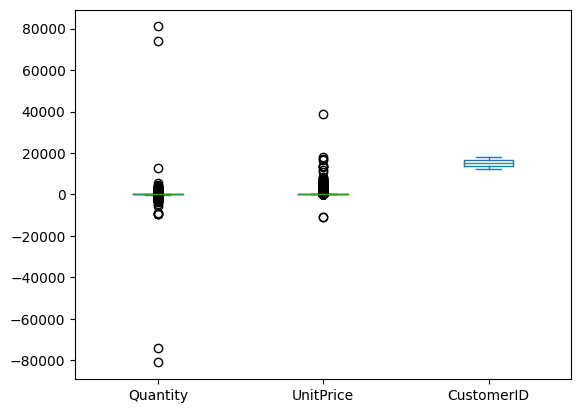

In [43]:
data.plot.box()

In [44]:
data.dtypes


InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [46]:
data = data.astype({"CustomerID":"string"})
data = data.astype({"InvoiceDate":"string"})


In [21]:
data.dtypes


InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
Data            string
HORARIO         string
UnitPrice      float64
CustomerID      string
Country         object
dtype: object

In [47]:
%pip install --upgrade matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 71.7 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.3
    Uninstalling matplotlib-3.5.3:
      Successfully uninstalled matplotlib-3.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.3.0 requires matplotlib<3.6,>=3.2, but you have matplotlib 3.7.1 which is incompatible.


In [48]:
data.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [49]:
data.describe()

,Quantity,UnitPrice
count,541909.000000,541909.000000
mean,9.552250,4.611114
std,218.081158,96.759853
min,-80995.000000,-11062.060000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,38970.000000


In [15]:
data.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
Data                0
HORARIO             0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [16]:
data.dropna(inplace=True)

In [17]:
#valores duplicados

data.duplicated().sum()

5225

In [40]:
# valores nulos por duplicata
(
  data
 .groupby(data.columns.tolist(), dropna=False)
 .size()
 .to_frame('n_duplicates')
 .query('n_duplicates>1')
 .sort_values('n_duplicates', ascending=False)
 .head(5)
 )

n_duplicates
InvoiceNo StockCode Description                         Quantity Data                HORARIO  UnitPrice CustomerID Country                     
555524    22698     PINK REGENCY TEACUP AND SAUCER      1        2011-05-06 00:00:00 11:37:00 2.95      16923.0    United Kingdom            20
          22697     GREEN REGENCY TEACUP AND SAUCER     1        2011-05-06 00:00:00 11:37:00 2.95      16923.0    United Kingdom            12
572861    22775     PURPLE DRAWERKNOB ACRYLIC EDWARDIAN 12       10/26/2011          12:46:00 1.25      14102.0    United Kingdom             8
572344    M         Manual                              48       10/24/2011          10:43:00 1.50      14607.0    United Kingdom             6
540524    21756     BATH BUILDING BLOCK WORD            1        2011-09-01 00:00:00 12:53:00 5.95      16735.0    United Kingdom             6

In [44]:
#remover dados faltantes

data.drop_duplicates()
data.drop_duplicates(subset=['UnitPrice'])

,InvoiceNo,StockCode,Description,Quantity,Data,HORARIO,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 00:00:00,08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 00:00:00,08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 00:00:00,08:26:00,2.75,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-01-12 00:00:00,08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-01-12 00:00:00,08:26:00,4.25,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...,...
533739,581105,23552,BICYCLE PUNCTURE REPAIR KIT,620,2011-07-12 00:00:00,12:14:00,1.86,16000.0,United Kingdom
533741,581107,23461,SWEETHEART BIRD HOUSE,620,2011-07-12 00:00:00,12:15:00,3.30,16000.0,United Kingdom
533751,581110,23486,ANTIQUE HEART SHELF UNIT,150,2011-07-12 00:00:00,12:17:00,13.35,16000.0,United Kingdom
540015,581455,23531,WALL ART BIG LOVE,12,2011-08-12 00:00:00,18:25:00,4.76,18102.0,United Kingdom


Visualize os outliers e
remova os outliers extremos em que a quantidade do item na compra é
superior a 10.000, e o preço unitário é maior que 5.000.

In [45]:
print(data['UnitPrice'].isnull().any())

False


In [35]:
data = data.query("Quantity > 10000 and UnitPrice > 5000")

ica: Utilize as colunas Quantity e UnitPrice. Crie uma coluna adicional
com o preço total da compra



In [54]:
data["TotalPrice"] = data['Quantity']*data['UnitPrice']

In [55]:
data.head()
data.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-09-12 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-09-12 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-09-12 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-09-12 12:50:00,4.15,12680.0,France,16.60
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-09-12 12:50:00,4.95,12680.0,France,14.85


Dica: Utilize a função max(). Calcule a data da última compra no dataset
como um todo, pois vamos utilizar este valor como data de comparação
para cálculo da recência

In [52]:
ultima_compra = data['InvoiceDate'].max()
ultima_compra

'9/30/2011 9:45'

Etapa 09) Plotando gráficos
Top 10 países com maior valor em vendas
Top 10 produtos mais vendidos
Valor de venda total por mês
Valor de venda total por mês e por país (considere apenas os top 10)

<ipython-input-65-2b80ace17a81>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Date'] = pd.to_datetime(filtered_data['Date'])
<ipython-input-65-2b80ace17a81>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Month'] = filtered_data['Date'].dt.month


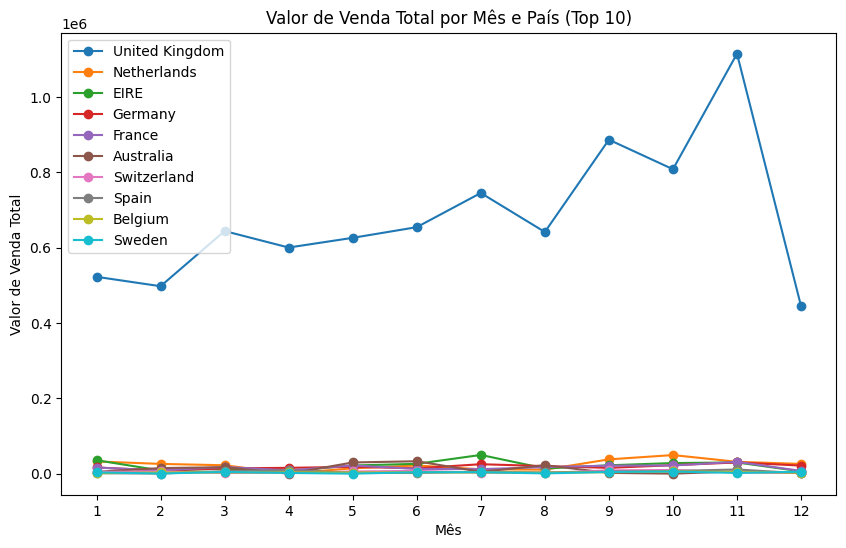

In [65]:
# Filtrar os dados para incluir apenas os top 10 países com base no valor total de vendas
top_10_countries = data.groupby('Country')['TotalPrice'].sum().nlargest(10).index
filtered_data = data[data['Country'].isin(top_10_countries)]

# Converter a coluna de datas para o tipo de dados de data, se necessário
filtered_data['Date'] = pd.to_datetime(filtered_data['Date'])

# Extrair o mês de cada data e criar uma nova coluna 'Month'
filtered_data['Month'] = filtered_data['Date'].dt.month

# Agrupar os dados pelo mês e país, e calcular o valor total de vendas para cada combinação
sales_by_month_country = filtered_data.groupby(['Month', 'Country'])['TotalPrice'].sum()

# Criar um gráfico de linha separado para cada país
plt.figure(figsize=(10, 6))
for country in top_10_countries:
    monthly_sales = sales_by_month_country.loc[:, country]
    plt.plot(monthly_sales.index.get_level_values('Month'), monthly_sales.values, marker='o', label=country)

plt.xlabel('Mês')
plt.ylabel('Valor de Venda Total')
plt.title('Valor de Venda Total por Mês e País (Top 10)')
plt.xticks(range(1, 13))  # Definir os rótulos do eixo x como meses de 1 a 12
plt.legend()
plt.show()

In [68]:
# Calcular a recência (R)
last_purchase_date = data['InvoiceDate'].max()
data['Recency'] = (last_purchase_date - data.groupby('CustomerID')['InvoiceDate'].max()).dt.days

# Calcular a frequência (F)
data['Frequency'] = data.groupby('CustomerID')['Quantity'].transform('nunique')

# Calcular o ticket médio (M)
data['Monetary'] = data.groupby('CustomerID')['TotalPrice'].transform('mean')

# Aplicar a análise RFM
rfm_data = data.groupby('CustomerID').agg({'Recency': 'min', 'Frequency': 'mean', 'Monetary': 'mean'})

# Exibir o resultado do RFM
print(rfm_data.head())

            Recency  Frequency   Monetary
CustomerID                               
12346.0         NaN        2.0   0.000000
12347.0         NaN       15.0  23.681319
12348.0         NaN       10.0  57.975484
12349.0         NaN       12.0  24.076027
12350.0         NaN        5.0  19.670588


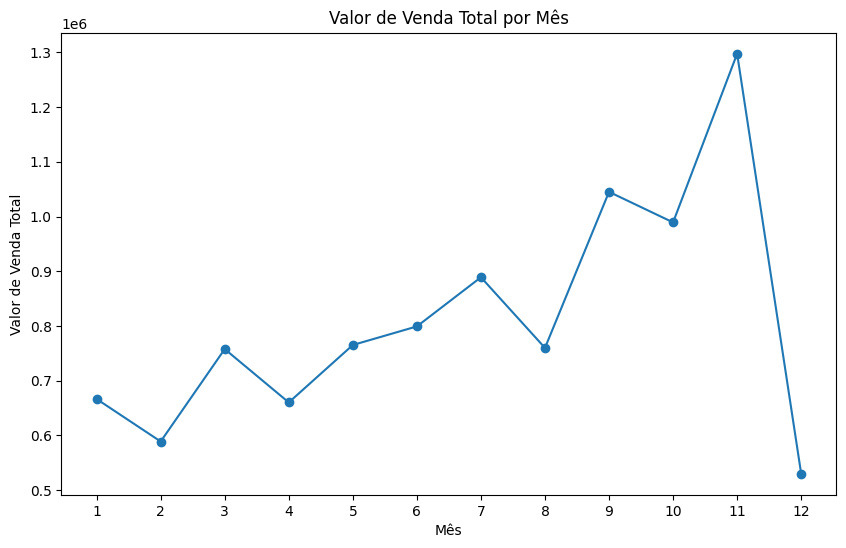

In [67]:

# Converter a coluna de datas para o tipo de dados de data, se necessário
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# Extrair o mês de cada data e criar uma nova coluna 'Month'
data['Month'] = data['Date'].dt.month

# Agrupar os dados pelo mês e calcular o valor total de vendas para cada mês
sales_by_month = data.groupby('Month')['TotalPrice'].sum()

# Criar o gráfico de linha
plt.figure(figsize=(10, 6))
plt.plot(sales_by_month.index, sales_by_month.values, marker='o')
plt.xlabel('Mês')
plt.ylabel('Valor de Venda Total')
plt.title('Valor de Venda Total por Mês')
plt.xticks(range(1, 13))  # Definir os rótulos do eixo x como meses de 1 a 12
plt.show()

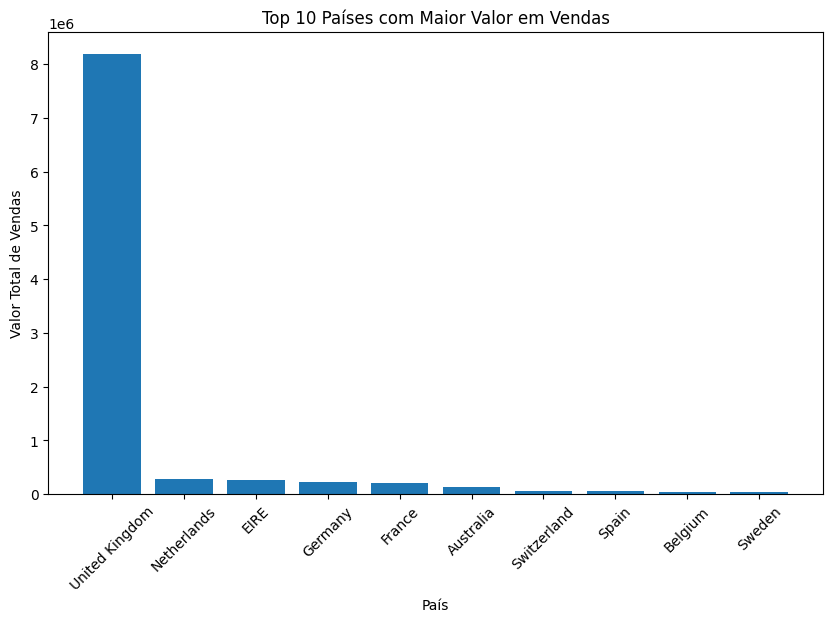

In [58]:
import matplotlib.pyplot as plt

# Agrupar os dados por país e calcular o valor total de vendas
country_sales = data.groupby('Country')['TotalPrice'].sum()

# Ordenar os dados em ordem decrescente
sorted_sales = country_sales.sort_values(ascending=False)

# Selecionar os top 10 países com o maior valor em vendas
top_10_countries = sorted_sales.head(10)

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(top_10_countries.index, top_10_countries.values)
plt.xlabel('País')
plt.ylabel('Valor Total de Vendas')
plt.title('Top 10 Países com Maior Valor em Vendas')
plt.xticks(rotation=45)
plt.show()

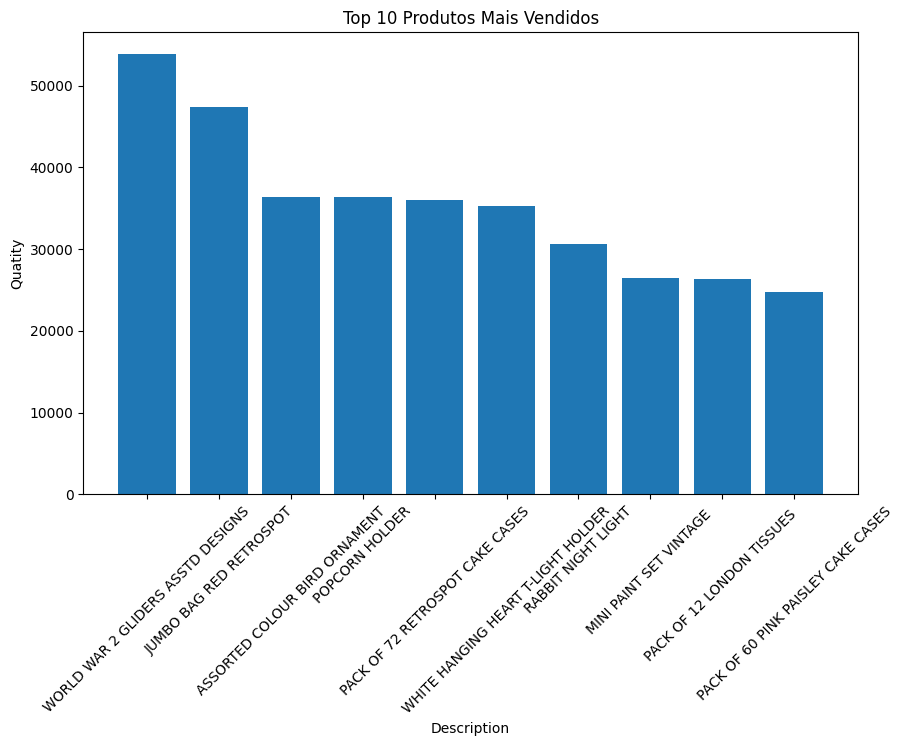

In [63]:
# Agrupe os dados por produto e calcule a quantidade total vendida para cada produto
product_sales = data.groupby('Description')['Quantity'].sum()

# Ordene os dados em ordem decrescente
sorted_sales = product_sales.sort_values(ascending=False)

# Selecione os top 10 produtos com maior quantidade vendida
top_10 = sorted_sales.head(10)

# Crie o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(top_10.index, top_10.values)
plt.xlabel('Description')
plt.ylabel('Quatity')
plt.title('Top 10 Produtos Mais Vendidos')
plt.xticks(rotation=45)
plt.show()
 

10 - Calculo do RFM 

Dica: Agrupe os dados por cliente e pedido/compra (InvoiceNo) e obtenha a
data e o preço total do pedido.
Com isso, agrupe novamente apenas por cliente e calcule o RFM, onde:
- R é a recência, diferença em dias da última compra do cliente e da última
compra disponível no conjunto de dados, que calcularam previamente.
- F é a frequência, ou seja, a quantidade de compras feitas pelo cliente;
- M é o ticket médio, ou seja, a média das compras feitas pelo cliente